In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Huts dataset

In [2]:
index = 7

In [3]:
huts = cv2.imread("./data/single_buildings/building_mask_%d.png" % index)

In [4]:
with open('./data/single_buildings/building_coords.csv') as f:
    all_coords = f.readlines()
all_coords = [x.strip().split(',')[1:] for x in all_coords]

In [5]:
coords = all_coords[index]
coords = [float(x) for x in coords]

In [6]:
coords_x = coords[0::2]

In [7]:
coords_y = coords[1::2]

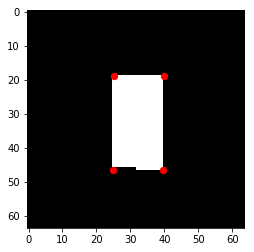

In [8]:
plt.imshow(huts)
plt.scatter(coords_x, coords_y, c = 'r', s = 40)
plt.show()

## Inira dataset

In [9]:
image = cv2.imread('./data/AerialImageDataset/train/gt/austin10.tif')

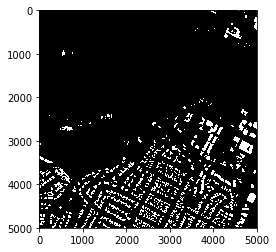

In [10]:
plt.imshow(image)
plt.show()

In [11]:
img = image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#find Harris corners
gray = np.float32(gray)

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
dst = np.uint8(dst)

#find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

#define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
#here u can get corners
print (corners)

#Now draw them
# res = np.hstack((centroids,corners)) 
# res = np.int0(res) 
# img[res[:,1],res[:,0]]=[0,0,255] 
# img[res[:,3],res[:,2]] = [0,255,0]
# cv2.imwrite('1.png',img)

[[ 2.4987590e+03  2.4929893e+03]
 [ 3.8456655e+03  2.2376995e-01]
 [ 4.0115996e+03 -7.5279810e-02]
 ...
 [ 3.7423843e+03  4.9990771e+03]
 [ 3.7783599e+03  4.9990806e+03]
 [ 3.7856497e+03  4.9987891e+03]]


In [12]:
# fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
# plt.figure(figsize=(8,8))
# plt.imshow(image)
# plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 2)
# fig.savefig('processed_corners.')   # save the figure to file
# plt.close(fig)    # close the figure

### Detecting boundary corners of each individual building

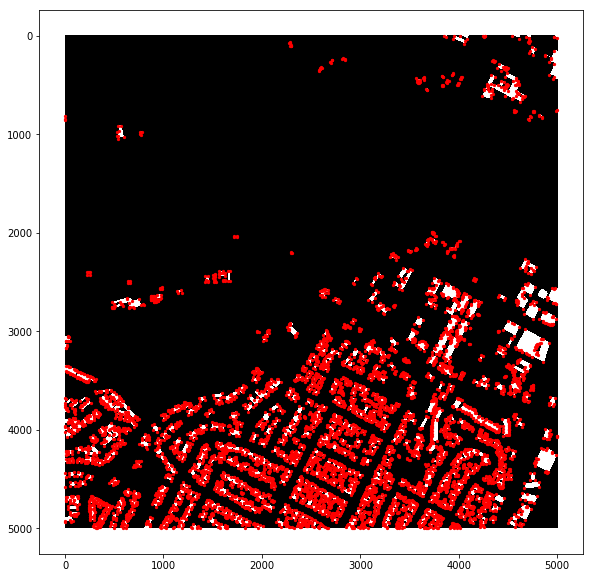

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 5)
plt.savefig('./processed.png')

# Instance segmentation using contour plots.

In [14]:
image = cv2.imread('./data/AerialImageDataset/train/gt/austin10.tif')

In [15]:
img = np.copy(image[4500:5000,0:500]) #Image matrix

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Convert any colors to B/W

#find contour levels.
ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_TC89_KCOS)
output = 5
contours2 = cv2.approxPolyDP(contours[2], 2, True)


# #Harrison corner detection plots. 
# gray = np.float32(gray)

# dst = cv2.cornerHarris(gray,2,3,0.04)
# dst = cv2.dilate(dst,None)
# ret, dst = cv2.threshold(dst,0.1*dst.max(),255,0)
# dst = np.uint8(dst)

# #find centroids
# ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# #define the criteria to stop and refine the corners
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
# corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# #here u can get corners
# print (corners)


In [17]:
print(contours2)

[[[342 423]]

 [[333 433]]

 [[333 443]]

 [[329 450]]

 [[343 458]]

 [[341 461]]

 [[362 473]]

 [[371 456]]

 [[366 449]]

 [[370 447]]

 [[377 451]]

 [[382 441]]]


In [18]:
print(hierarchy[0])

[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [ 8  6 -1 -1]
 [ 9  7 -1 -1]
 [10  8 -1 -1]
 [11  9 -1 -1]
 [12 10 -1 -1]
 [13 11 -1 -1]
 [14 12 -1 -1]
 [15 13 -1 -1]
 [16 14 -1 -1]
 [17 15 -1 -1]
 [18 16 -1 -1]
 [19 17 -1 -1]
 [20 18 -1 -1]
 [21 19 -1 -1]
 [22 20 -1 -1]
 [23 21 -1 -1]
 [24 22 -1 -1]
 [25 23 -1 -1]
 [26 24 -1 -1]
 [-1 25 -1 -1]]


In [19]:
print(contours[2].shape)

(39, 1, 2)


In [20]:
print(img[0:1000,400:600].shape)

(500, 100, 3)


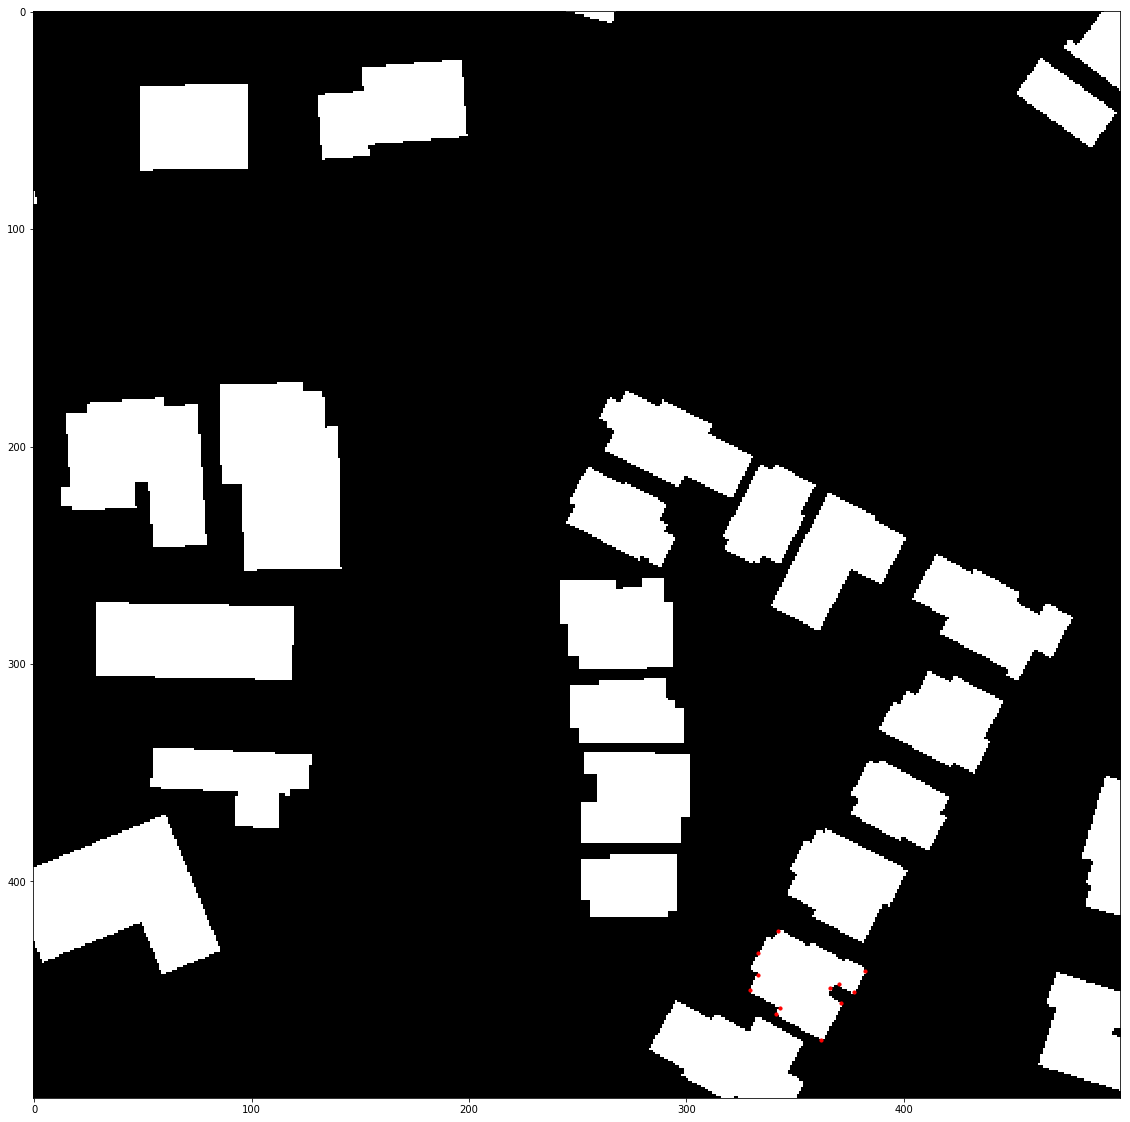

In [21]:
plt.figure(figsize=(20,20))
plt.imshow(img)
for plot in contours2:
    plt.scatter(plot[0][0], plot[0][1], c='r', s=10)
# plt.scatter(corners[1:,0],corners[1:,1], c = 'r', s = 5)
plt.savefig('./processed.png')

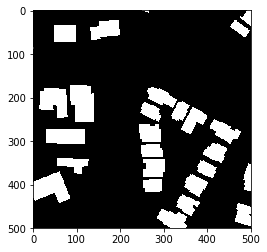

In [22]:
plt.imshow(img,cmap='gray')

# Selecting individual buildings from the mask. 

In [23]:
#Given the city mask, the below code segments the dataset to individual buildings
#It also detects edge corners and produces a outline of the building
#Each building is also displayed from the original satelite image

In [23]:
imageName = 'austin6'

In [24]:
mskImage = cv2.imread('./data/AerialImageDataset/train/gt/'+imageName+'.tif') #These are the ground gt
satImage = cv2.imread('./data/AerialImageDataset/train/images/'+imageName+'.tif') #These are the training images,

In [25]:
#Image dimensions used when validating.
image_x = mskImage.shape[0]
image_y = mskImage.shape[1]
print(image_x, image_y)

5000 5000


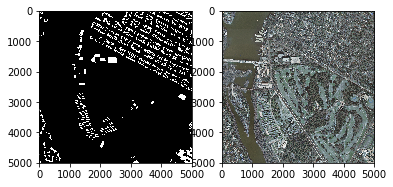

In [26]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(mskImage)
axarr[1].imshow(satImage)

In [27]:
#Corner detection
gray = cv2.cvtColor(mskImage,cv2.COLOR_BGR2GRAY) #Convert any colors to B/W
ret, thresh = cv2.threshold(gray, 127, 255, 0) #The threshold of our mask.
#Threshold of detection. RETR_EXTERNAL = Use only outer layer. Chaining with TC_KCOS
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_TC89_KCOS)

In [28]:
#Smoothing of each detected object to reduce number of unwanted points
smoothContours = []
for building in contours:
    smoothed = cv2.approxPolyDP(building, 2, True)
    smoothed = smoothed.squeeze() #Reduce dim to x, y.
    smoothContours.append(smoothed)

In [29]:
#Check if building after cropped out is part of the sattelite image.
def checkValid(buildingArray, margin):
    max_x = max(buildingArray[:,0])
    max_y = max(buildingArray[:,1])
    min_x = min(buildingArray[:,0])
    min_y = min(buildingArray[:,1])
    if (max_x + margin) > image_x or (min_x - margin) < 0 :
        return(False)
    elif (max_y + margin) > image_y or (min_y - margin) < 0:
        return(False)
    else:
        return(True)

In [30]:
def generateDataBuilding(buildingArray, image, margin, identifier, showPlot=False):
    buildingArray = np.copy(buildingArray)
    
    #Check if this building can be plotted
    if checkValid(buildingArray, margin) == False:
        print("Coordinates not valid")
        print(buildingArray)
        return

    max_x = max(buildingArray[:,0])
    min_x = min(buildingArray[:,0])
    max_y = max(buildingArray[:,1])
    min_y = min(buildingArray[:,1])
    
    #Reshape the points to correspond to crop offset. 
    for i in range(buildingArray.shape[0]):
        buildingArray[i][0] -= (min_x-margin)
        buildingArray[i][1] -= (min_y-margin)
        
    #Save our bounding box coordinates. 
    #The coordinate order is the correct path to trace the bbox.
    print('./data/genTrain/'+imageName+'/'+identifier+'.txt')
    with open('./data/genTrain/'+imageName+'/'+identifier+'.txt','w') as filetowrite:
        for line in buildingArray:
            filetowrite.write(str(line[0])+" "+str(line[1])+"\n")
        filetowrite.close()
    
    #Plot figure and our corner points
    fig = plt.figure(figsize=(4,4), frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    
    ax.imshow(image[min_y-margin:max_y+margin,min_x-margin:max_x+margin], origin='lower')
    ax.scatter(buildingArray[:,0], buildingArray[:,1], c='r', s=10)
    fig.savefig('./data/genTrain/'+imageName+'/'+identifier+'.png');
    
    #Don't show plot
    if showPlot == False:
        plt.close(fig)

#     plt.figure(figsize=(4,4))
#     plt.imshow(image[min_y-margin:max_y+margin,min_x-margin:max_x+margin], origin='lower')
#     plt.scatter(buildingArray[:,0], buildingArray[:,1], c='r', s=10)
#     plt.savefig('./data/genTrain/'+imageName+'/'+identifier+'.png');


# Creating a dataset

In [33]:
for index in range(len(smoothContours)):
    generateDataBuilding(smoothContours[index], satImage, 20, str(index), False)

Coordinates not valid
[[4502 4999]
 [4510 4999]
 [4504 4995]]
Coordinates not valid
[[4258 4999]
 [4285 4999]
 [4264 4988]]
Coordinates not valid
[[  84 4999]
 [ 120 4999]
 [  96 4984]]
Coordinates not valid
[[4245 4970]
 [4241 4978]
 [4251 4983]
 [4255 4975]]
Coordinates not valid
[[4450 4949]
 [4439 4966]
 [4443 4969]
 [4437 4980]
 [4457 4989]
 [4460 4982]
 [4468 4981]
 [4477 4964]]
Coordinates not valid
[[4290 4928]
 [4273 4961]
 [4310 4982]
 [4317 4983]
 [4321 4972]
 [4316 4968]
 [4329 4950]]
Coordinates not valid
[[  44 4927]
 [   7 4963]
 [  20 4977]
 [  18 4979]
 [  38 4999]
 [  51 4998]
 [  82 4966]]
./data/genTrain/austin6/7.txt
./data/genTrain/austin6/8.txt
./data/genTrain/austin6/9.txt
Coordinates not valid
[[3260 4981]
 [3225 4935]
 [3227 4934]
 [3223 4927]
 [3215 4922]
 [3190 4891]
 [3146 4925]
 [3144 4923]
 [3138 4927]
 [3132 4936]
 [3080 4976]
 [3098 4999]
 [3236 4999]]
./data/genTrain/austin6/11.txt
./data/genTrain/austin6/12.txt
./data/genTrain/austin6/13.txt
./data/ge

./data/genTrain/austin6/177.txt
./data/genTrain/austin6/178.txt
./data/genTrain/austin6/179.txt
./data/genTrain/austin6/180.txt
./data/genTrain/austin6/181.txt
./data/genTrain/austin6/182.txt
./data/genTrain/austin6/183.txt
./data/genTrain/austin6/184.txt
./data/genTrain/austin6/185.txt
./data/genTrain/austin6/186.txt
./data/genTrain/austin6/187.txt
./data/genTrain/austin6/188.txt
./data/genTrain/austin6/189.txt
./data/genTrain/austin6/190.txt
./data/genTrain/austin6/191.txt
./data/genTrain/austin6/192.txt
./data/genTrain/austin6/193.txt
./data/genTrain/austin6/194.txt
./data/genTrain/austin6/195.txt
./data/genTrain/austin6/196.txt
./data/genTrain/austin6/197.txt
./data/genTrain/austin6/198.txt
./data/genTrain/austin6/199.txt
./data/genTrain/austin6/200.txt
./data/genTrain/austin6/201.txt
./data/genTrain/austin6/202.txt
./data/genTrain/austin6/203.txt
./data/genTrain/austin6/204.txt
./data/genTrain/austin6/205.txt
./data/genTrain/austin6/206.txt
./data/genTrain/austin6/207.txt
./data/g

Coordinates not valid
[[4999 1050]
 [4986 1075]
 [4975 1072]
 [4959 1109]
 [4999 1129]]
./data/genTrain/austin6/418.txt
./data/genTrain/austin6/419.txt
./data/genTrain/austin6/420.txt
./data/genTrain/austin6/421.txt
./data/genTrain/austin6/422.txt
./data/genTrain/austin6/423.txt
Coordinates not valid
[[4997 1029]
 [4993 1036]
 [4999 1038]]
./data/genTrain/austin6/425.txt
./data/genTrain/austin6/426.txt
./data/genTrain/austin6/427.txt
./data/genTrain/austin6/428.txt
./data/genTrain/austin6/429.txt
./data/genTrain/austin6/430.txt
./data/genTrain/austin6/431.txt
./data/genTrain/austin6/432.txt
./data/genTrain/austin6/433.txt
./data/genTrain/austin6/434.txt
./data/genTrain/austin6/435.txt
./data/genTrain/austin6/436.txt
./data/genTrain/austin6/437.txt
./data/genTrain/austin6/438.txt
./data/genTrain/austin6/439.txt
./data/genTrain/austin6/440.txt
./data/genTrain/austin6/441.txt
./data/genTrain/austin6/442.txt
./data/genTrain/austin6/443.txt
./data/genTrain/austin6/444.txt
./data/genTrain/au

./data/genTrain/austin6/660.txt
./data/genTrain/austin6/661.txt
./data/genTrain/austin6/662.txt
./data/genTrain/austin6/663.txt
Coordinates not valid
[[4985  268]
 [4972  298]
 [4999  310]
 [4999  273]]
./data/genTrain/austin6/665.txt
./data/genTrain/austin6/666.txt
./data/genTrain/austin6/667.txt
./data/genTrain/austin6/668.txt
./data/genTrain/austin6/669.txt
./data/genTrain/austin6/670.txt
./data/genTrain/austin6/671.txt
./data/genTrain/austin6/672.txt
./data/genTrain/austin6/673.txt
./data/genTrain/austin6/674.txt
./data/genTrain/austin6/675.txt
Coordinates not valid
[[4993  231]
 [4985  248]
 [4999  254]
 [4998  233]]
Coordinates not valid
[[ 16 229]
 [ 27 263]
 [ 38 261]
 [ 41 271]
 [ 46 269]
 [ 49 277]
 [ 58 274]
 [ 55 260]
 [ 60 260]
 [ 62 266]
 [ 75 262]
 [ 75 254]
 [113 244]
 [107 224]
 [ 81 231]
 [ 79 227]
 [ 66 231]
 [ 62 227]
 [ 48 230]
 [ 47 226]
 [ 41 223]]
./data/genTrain/austin6/678.txt
./data/genTrain/austin6/679.txt
./data/genTrain/austin6/680.txt
./data/genTrain/aust

IndexError: too many indices for array